# 4. Self Organizing Maps

### Importing the libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [8]:
dataset = pd.read_csv("../data/Part 4 - Self Organizing Maps (SOM)/Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)


### Training the SOM

In [11]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100000, verbose=True)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.38282479704271827


### Visualizing the results

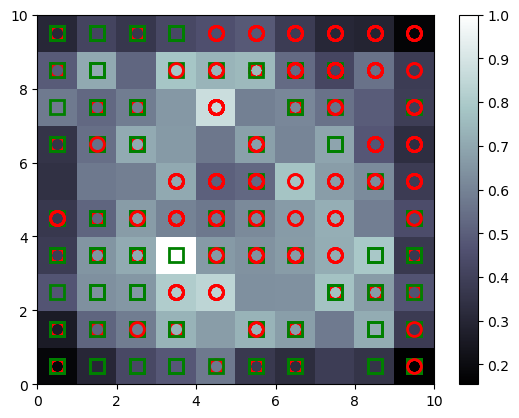

In [12]:
from pylab import bone, pcolor, colorbar, show, plot
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize=10, markeredgewidth=2)
show()

### Finding the frauds

In [13]:
mapping = som.win_map(X)
frauds = np.concatenate((mapping[(8,1)], mapping[(6,8)]), axis=0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5682686e+07 0.0000000e+00 3.1250000e+01 3.7500000e+00 2.0000000e+00
  1.3000000e+01 8.0000000e+00 6.2500000e-01 1.0000000e+00 1.0000000e+00
  9.0000000e+00 1.0000000e+00 2.0000000e+00 1.8100000e+02 1.0000000e+00]
 [1.5707602e+07 0.0000000e+00 2.2830000e+01 2.2900000e+00 2.0000000e+00
  1.1000000e+01 8.0000000e+00 2.2900000e+00 1.0000000e+00 1.0000000e+00
  7.0000000e+00 1.0000000e+00 2.0000000e+00 1.4000000e+02 2.3850000e+03]
 [1.5598614e+07 0.0000000e+00 2.3000000e+01 1.1750000e+01 2.0000000e+00
  1.4000000e+01 8.0000000e+00 5.0000000e-01 1.0000000e+00 1.0000000e+00
  2.0000000e+00 1.0000000e+00 2.0000000e+00 3.0000000e+02 5.5200000e+02]
 [1.5712483e+07 0.0000000e+00 4.6670000e+01 4.6000000e-01 2.0000000e+00
  1.3000000e+01 8.0000000e+00 4.1500000e-01 1.0000000e+00 1.0000000e+00
  1.1000000e+01 1.0000000e+00 2.0000000e+00 4.4000000e+02 7.0000000e+00]
 [1.5572361e+07 0.0000000e+00 4.1000000e+01 2.0400000e+00 1.0000000e+00
  1.1000000e+01 8.0000000e+00 1.2500000e-01 1.0000000e+00 1.